<a href="https://colab.research.google.com/github/Olowojaye/PersonalProjects/blob/main/Iris_Plant_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Iris Plant Type**

This project develops a classification model to predict the class of an Iris plant - whether it is Iris Setosa, Iris Versicolour, or Iris Virginica - by considering such attributes as its sepal length, sepal width, petal length, and petal width, all measured in centimeters.

### Data Collection

The dataset used is downloaded from the public [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris) of the University of California, Irvine.

In [1]:
# Import the required packages
import pandas as pd
import numpy as np

# Set file url and load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Since dataset has no header row, we define column headers using the information on the data source
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset = pd.read_csv(url, header = None)
dataset.columns = cols
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Wrangling

We examine here if there are any inconsistencies in the data and cater for them. We also carry out all such other operations necessary to make our dataset model-ready.

In [2]:
#Check for missing values
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [3]:
#No missing values in any of the columns
#Next, we check that all entries have the appropriate formatting
dataset.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [4]:
#Split dataset into features (X) and target (Y)
X = dataset[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y = dataset['class'].values

# Encode the Y values
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
Y_encoded = label_encode.fit_transform(Y)
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
#Apply standard scaling to X 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
#Split X, Y into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=2)

### Data Exploration

Here, we examine the cleaned dataframe for insights.

In [7]:
#Descriptive statistics
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Examine the correlation between the variables
dataset.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


This result suggests that petal length and petal width, being highly positively correlated (0.962757), would have approximately the same influence on determining the class if either of them was used instead of both.

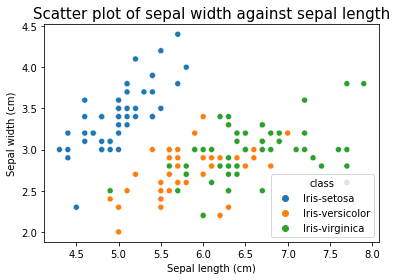

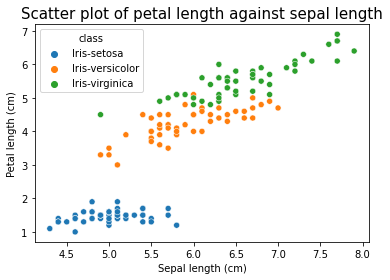

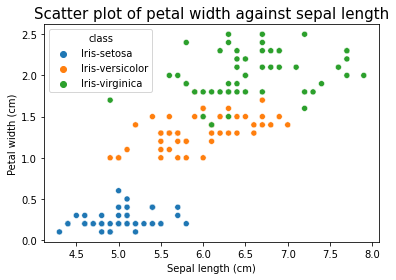

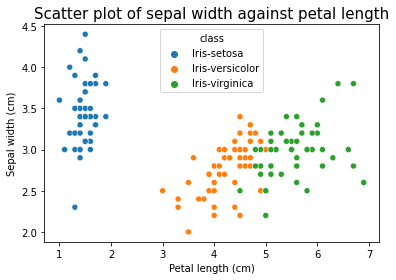

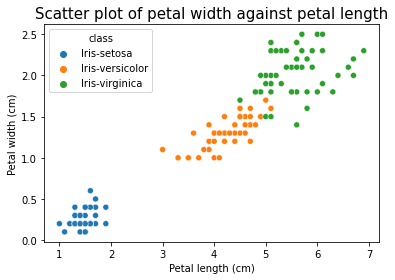

In [9]:
#We can visualize the relationships using a scatter plot with 'class' as hue
import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plots, picking two attributes at a time, with 'class' as hue
cols_ = list(X.columns) #List containing features
for att_x in cols_:
  cols_.remove(att_x)
  for att_y in cols_:
    sns.scatterplot(data=dataset, x= att_x, y= att_y, hue="class")
    plt.title('Scatter plot of {} against {}'.format(att_y, att_x), fontsize=15)
    plt.xlabel(att_x.capitalize() + " (cm)")
    plt.ylabel(att_y.capitalize() + " (cm)")
    plt.show()
    print('')


The last plot suggests that a reasonably-accurate classification could be done using petal width and petal length attributes only.

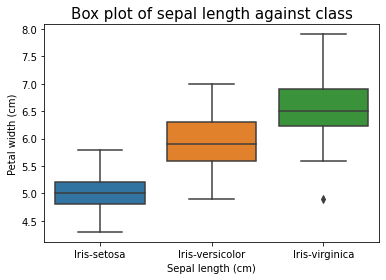

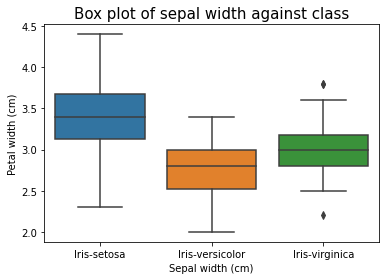

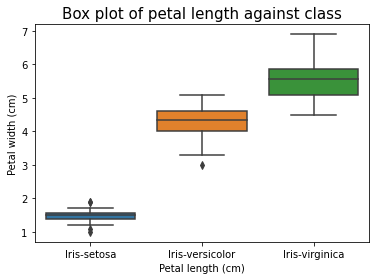

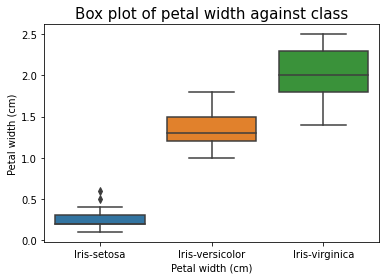

In [10]:
#We also examine the distribution of each class using box plots
cols_ = list(X.columns) #List containing features
for att_x in cols_:
  sns.boxplot(data=dataset, x= 'class', y= att_x)
  plt.title('Box plot of {} against class'.format(att_x), fontsize=15)
  plt.xlabel(att_x.capitalize() + " (cm)")
  plt.ylabel(att_y.capitalize() + " (cm)")
  plt.show()
  print('')

This shows that a rough classification could be made using either petal width or petal length.

### Model Development

Now, we develop a classification model to fit the data.

In [11]:
#We obtain the best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Using decision trees...
from sklearn.tree import DecisionTreeClassifier

#Check for the best maximum depth, from 3 to 20
Ks = 20
mean_acc_tree = np.zeros((Ks))

for n in range(1,Ks):
    #Train Model and Predict  
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=tree.predict(X_test)
    mean_acc_tree[n-1] = accuracy_score(y_test, yhat)

print(mean_acc_tree,'\n')
print( "The best accuracy was", mean_acc_tree.max(), "with max_depth =", mean_acc_tree.argmax()+1) 

[0.66666667 0.95555556 0.97777778 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.        ] 

The best accuracy was 0.9777777777777777 with max_depth = 3


In [12]:
#Fit decision tree model with the best parameter so obtained
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 3).fit(X_train,y_train)
yhat=tree_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.9777777777777777

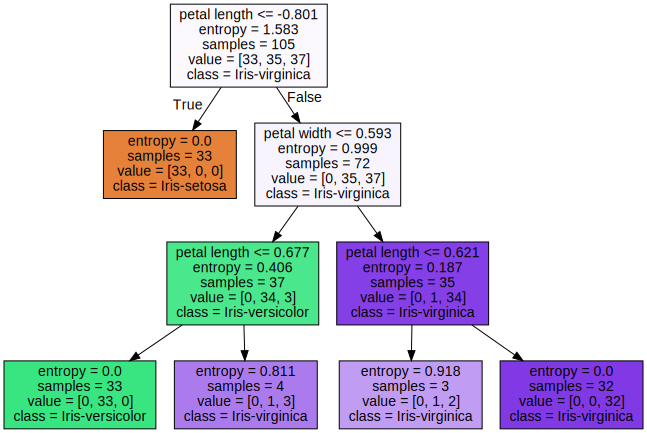

In [13]:
#Visualize decision tree model
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X.columns[0:4],  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Other classification models may be used. However, the decision tree model gives a satisfactory accuracy.